## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fim import apriori

## Loading the data set

In [4]:
df = pd.read_csv('data/clean_df.csv', index_col=0, decimal='.')

In [11]:
transactions = df.groupby(['BasketID'])['ProdDescr'].apply(list)
baskets = transactions.values

print("NUM OF BASKETS: {}".format(len(baskets)))

NUM OF BASKETS: 18532


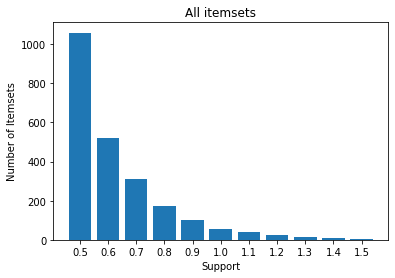

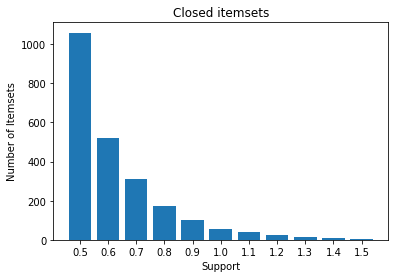

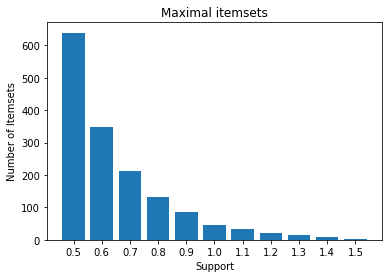

In [12]:
def plot_frequent_patterns(target, title):
    res = {}
    for i in np.arange(.5, 1.6, .1):
        supp = round(i,2)
        sets = apriori(baskets, supp=supp, zmin=3, target=target)
        res[supp] = len(sets)

    plt.bar(range(len(res)), list(res.values()), align='center')
    plt.xticks(range(len(res)), list(res.keys()))


    plt.xlabel("Support")
    plt.ylabel("Number of Itemsets")
    plt.title("{} itemsets".format(title))
    plt.show()

plot_frequent_patterns('a', "All")
plot_frequent_patterns('c', "Closed")
plot_frequent_patterns('m', "Maximal")

# Association Rules

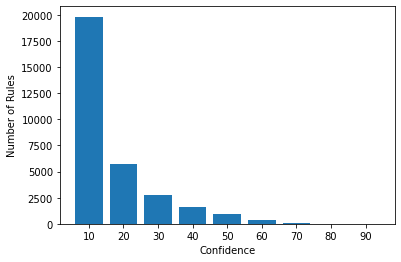

In [13]:
def plot_rules_confidence():
    bar_res = {}
    for i in np.arange(10, 100, 10):
        rls = apriori(baskets, supp=1, zmin=3, conf=i, target='r')
        bar_res[i] = len(rls)

    plt.bar(range(len(bar_res)), list(bar_res.values()), align='center')
    plt.xticks(range(len(bar_res)), list(bar_res.keys()))

    plt.xlabel("Confidence")
    plt.ylabel("Number of Rules")
    plt.show()

plot_rules_confidence()

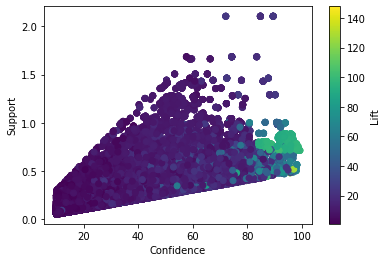

In [14]:
def plot_conf_support():
    res = []
    for supp in np.arange(.5, 1.6, .1):
        for confidence in np.arange(10, 100, 10):
            support = round(supp,2)
            rls = apriori(baskets, supp=support, conf=confidence, zmin=3, target='r', report='SCl')
            for r in rls:
                res.append({ 'supp': r[2], 'conf': r[3], 'lift': r[4]})

    df_results = pd.DataFrame(res)
    df_results = df_results.sample(100000)

    plt.scatter(df_results['conf'], df_results['supp'], c=df_results['lift'], cmap='viridis')
    plt.xlabel("Confidence")
    plt.ylabel("Support")
    plt.colorbar(label="Lift")
    plt.show()

plot_conf_support()

In [17]:
itemsets = apriori(baskets, supp=1, zmin=3, target='a', report='aS')
df_itemsets = pd.DataFrame(itemsets, columns=['Itemset', 'Count', 'Support'])
df_itemsets['Support'] = df_itemsets['Support'].round(2)
df_itemsets.sort_values('Support', ascending=False, inplace=True)
df_itemsets[:10]

,Itemset,Count,Support
2,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",390,2.10
8,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",312,1.68
46,"(LUNCH BAG PINK POLKADOT, LUNCH BAG BLACK SKU...",308,1.66
44,"(LUNCH BAG PINK POLKADOT, LUNCH BAG CARS BLUE,...",279,1.51
4,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",271,1.46
7,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",267,1.44
5,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",265,1.43
50,"(LUNCH BAG CARS BLUE, LUNCH BAG BLACK SKULL.,...",262,1.41
41,"(LUNCH BAG PINK POLKADOT, LUNCH BAG CARS BLUE,...",260,1.40
31,"(LUNCH BAG WOODLAND, LUNCH BAG SPACEBOY DESIGN...",258,1.39


In [16]:
rules = apriori(baskets, supp=1, zmin=3, conf=70, target='r', report='SCl')

df_rules = pd.DataFrame(rules, columns =['Post', 'Pre', 'Support', 'Confidence', 'Lift'])
df_rules.sort_values('Support', ascending=False, inplace=True)
df_rules[:15]




,Post,Pre,Support,Confidence,Lift
35,GREEN REGENCY TEACUP AND SAUCER,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",2.104468,89.449541,23.989564
36,PINK REGENCY TEACUP AND SAUCER,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",2.104468,72.088725,24.027846
34,ROSES REGENCY TEACUP AND SAUCER,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",2.104468,84.782609,20.066300
60,ROSES REGENCY TEACUP AND SAUCER,"(GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKE...",1.683574,83.422460,19.744381
61,GREEN REGENCY TEACUP AND SAUCER,"(ROSES REGENCY TEACUP AND SAUCER , REGENCY CAK...",1.683574,74.285714,19.922762
38,PINK REGENCY TEACUP AND SAUCER,"(GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKE...",1.462335,72.459893,24.151560
37,GREEN REGENCY TEACUP AND SAUCER,"(PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...",1.462335,87.702265,23.520961
59,ALARM CLOCK BAKELIKE RED,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",1.440751,77.842566,16.449013
39,ROSES REGENCY TEACUP AND SAUCER,"(PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...",1.429959,85.760518,20.297751
88,LUNCH BAG RED RETROSPOT,"(LUNCH BAG SUKI DESIGN , LUNCH BAG PINK POLKADOT)",1.359810,70.391061,10.128006
